#**Actividad Semanal 5 Repaso de Transformacion y Reduccion de Datos**
**Adriana Fernanda Jimenez Avalos**
**A01087695**

In [78]:
#llamar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Bienvenido al notebook
#Repaso de Reducción de dimensiones
El objetivo es que entendamos de una manera visual, que es lo que pasa cuando nosotros seleccionamos cierto número de componentes principales o % de variabilidad  de una base de datos.

Primero entenderemos, que pasa adentro de PCA que se basa en lo siguiente a grandes razgos:

**Análisis de Componentes Principales**

El análisis de datos multivariados involucra determinar transformaciones lineales que ayuden
a entender las relaciones entre las características importantes de los datos. La idea central del Análisis de Componentes Principales (PCA) es reducir las dimensiones de un conjunto de datos que presenta variaciones correlacionadas, reteniendo una buena proporción de la variación presente en dicho conjunto. Esto se logra obteniendo la transformación a un nuevo conjunto de variables: los componentes principales (PC). Cada PC es una combinación lineal con máxima varianza en dirección ortogonal a los demás PC.


![title](https://miro.medium.com/max/720/1*XGaA7KWUlhWZLIezYEBIHA.gif)


Para entender un poco más de PCA y SVD, visita el siguiente link:
*Truco: Prueba entrar con tu cuenta del tec :)*

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


Basicamente, vamos a seguir los siguientes pasos:

1. Obtener la covarianza. OJO: X tiene sus datos centrados :)

![title](https://miro.medium.com/max/194/1*92t9OuqxIG0YpJXsNNgI4A.png)

2. Los componentes principales se van a obtener de la eigen descomposicion de la matriz de covarianza.

![title](https://miro.medium.com/max/260/1*c1S0_26A8RxEQQUVyMp5Vw.png)

3. Para la reducción de dimensiones vamos a seleccionar k vectores de W y proyectaremos nuestros datos.

![title](https://miro.medium.com/max/214/1*jnj2YMpWIApnCzxRU_zjfg.png)

![title](https://miro.medium.com/max/720/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg)






# Ejercicio 1, Descomposición y composición
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)




# Eigenvalores y eigenvectores

In [5]:
###-----------------EJEMPLO DE EIGENVALORES
import numpy as np
from numpy import array
from numpy.linalg import eig
# define la matriz
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = eig(A)
print(values) #D
print(vectors) #W

#Ejemplo de reconstrucción


values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
B= np.dot(np.dot(W,D), Winv)# se utiliza dot por ser el producto de dos arreglos
print(B)
print("-----------------------------")

-------Matriz original-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-----------------------------
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
-------Matriz reconstruida-------
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
-----------------------------


In [6]:
A = array([[3, 0, 2], [3, 0, -2], [0, 1, 1]])
values, vectors = eig(A)
print(values) #D
print(vectors) #W

[3.54451153+0.j         0.22774424+1.82582815j 0.22774424-1.82582815j]
[[-0.80217543+0.j         -0.04746658+0.2575443j  -0.04746658-0.2575443j ]
 [-0.55571339+0.j          0.86167879+0.j          0.86167879-0.j        ]
 [-0.21839689+0.j         -0.16932106-0.40032224j -0.16932106+0.40032224j]]


In [13]:
#Matriz 1

# define la matriz
M1 = array([[3, 0, 2], [3, 0, -2], [0, 1, 1]])
print("-------Matriz original-------")
print(M1)
print("-----------------------------")

# calcula la eigendescomposición
values, vectors = eig(M1)
print(values) #D
print(vectors) #W

#Ejemplo de reconstrucción

values, vectors = np.linalg.eig(M1)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)

#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv

B= np.dot(np.dot(W,D), Winv)# se utiliza dot por ser el producto de dos arreglos
print(B)
print("-----------------------------")

-------Matriz original-------
[[ 3  0  2]
 [ 3  0 -2]
 [ 0  1  1]]
-----------------------------
[3.54451153+0.j         0.22774424+1.82582815j 0.22774424-1.82582815j]
[[-0.80217543+0.j         -0.04746658+0.2575443j  -0.04746658-0.2575443j ]
 [-0.55571339+0.j          0.86167879+0.j          0.86167879-0.j        ]
 [-0.21839689+0.j         -0.16932106-0.40032224j -0.16932106+0.40032224j]]
-------Matriz reconstruida-------
[[ 3.00000000e+00+1.12272023e-16j  3.36536354e-16-9.67833078e-17j
   2.00000000e+00-3.95053829e-17j]
 [ 3.00000000e+00-1.66253281e-16j  9.99200722e-16+1.12958209e-16j
  -2.00000000e+00+2.77350775e-17j]
 [ 1.11022302e-16+1.03283117e-18j  1.00000000e+00-7.61630485e-17j
   1.00000000e+00+1.02438275e-16j]]
-----------------------------


Los resultados de la matriz uno entre A y B dan igual en cuanto al entero pero el B tiene decimales

In [14]:
#Matriz 2
# define la matriz
M2 = array([[7, 5, 1], [8, 8, -2], [2, 1, 2]])
print("-------Matriz original-------")
print(M2)
print("-----------------------------")

# calcula la eigendescomposición
values, vectors = eig(M2)
print(values) #D
print(vectors) #W

#Ejemplo de reconstrucción

values, vectors = np.linalg.eig(M2)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)

#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv

B= np.dot(np.dot(W,D), Winv)# se utiliza dot por ser el producto de dos arreglos
print(B)
print("-----------------------------")

-------Matriz original-------
[[ 7  5  1]
 [ 8  8 -2]
 [ 2  1  2]]
-----------------------------
[13.74967823  0.47102642  2.77929534]
[[-0.60272864 -0.60678122  0.53000393]
 [-0.77985147  0.72893982 -0.57251039]
 [-0.16896707  0.31695945  0.62556189]]
-------Matriz reconstruida-------
[[ 7.  5.  1.]
 [ 8.  8. -2.]
 [ 2.  1.  2.]]
-----------------------------


Los resultados de la matriz 2 A y B son iguales

In [16]:
#Matriz 3

# define la matriz
M3 = array([[11, 3, 7], [8, 5, -2], [3, 9, 1]])
print("-------Matriz original-------")
print(M3)
print("-----------------------------")

# calcula la eigendescomposición
values, vectors = eig(M3)
print(values) #D
print(vectors) #W

#Ejemplo de reconstrucción

values, vectors = np.linalg.eig(M3)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)

#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv

B= np.dot(np.dot(W,D), Winv)# se utiliza dot por ser el producto de dos arreglos
print(B)
print("-----------------------------")

-------Matriz original-------
[[11  3  7]
 [ 8  5 -2]
 [ 3  9  1]]
-----------------------------
[16.56665656+0.j         0.21667172+6.0641571j  0.21667172-6.0641571j]
[[-0.77886926+0.j         -0.28232951-0.31899864j -0.28232951+0.31899864j]
 [-0.46614472+0.j          0.03345092+0.57592551j  0.03345092-0.57592551j]
 [-0.41960907+0.j          0.6969367 +0.j          0.6969367 -0.j        ]]
-------Matriz reconstruida-------
[[11.-1.28007957e-17j  3.-4.64610290e-16j  7.-1.56450935e-16j]
 [ 8.+3.33168367e-17j  5.+2.28464646e-16j -2.-5.07881847e-16j]
 [ 3.-9.84071688e-17j  9.+3.52133393e-16j  1.-5.29985785e-16j]]
-----------------------------


Los resultados de la matriz uno entre A y B dan igual en cuanto al entero pero el B tiene decimales

**¿Qué significa  reducir dimensiones?**

Esto será cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los más importantes y viajemos de regreso a nuestras unidades a través de una proyección.

Es decir:
Unidades-PC
PC-Unidades

Veamoslo gráficamente, ¿qué pasa con esa selección de los PCs y su efecto?.


Para ello usaremos Singular Value Descomposition (SVD).



# Singular Value Descomposition(SVD)

Es otra descomposición que tambien nos ayudara a reducir dimensiones.

<img src="https://miro.medium.com/max/720/1*6wkgGgBy2NLVmRVOw8K86w.png" width="300">



#Ejercicio 2
Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

[72. 73. 74. ... 48. 47. 47.]


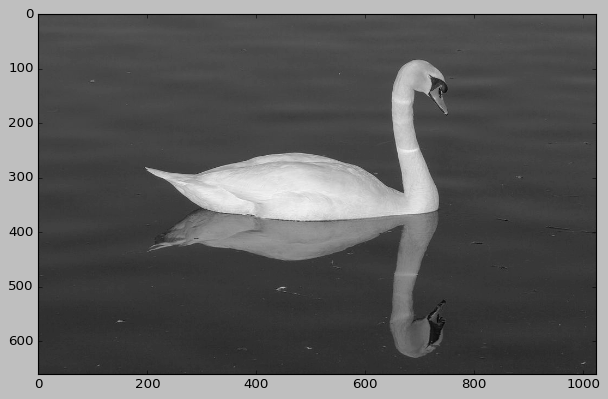

<PIL.Image.Image image mode=LA size=1024x660 at 0x7F41784DAB50>


In [17]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [18]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape


(660, 1024)

In [19]:
U.shape

(660, 660)

In [20]:
V.shape

(1024, 1024)

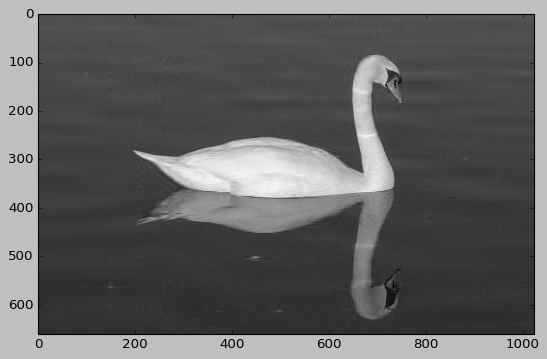

Felicidades la imagen está comprimida


In [21]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 50
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

¡Ahora es tu turno!, comprime 3 imagenes

[50. 50. 50. ... 50. 50. 50.]


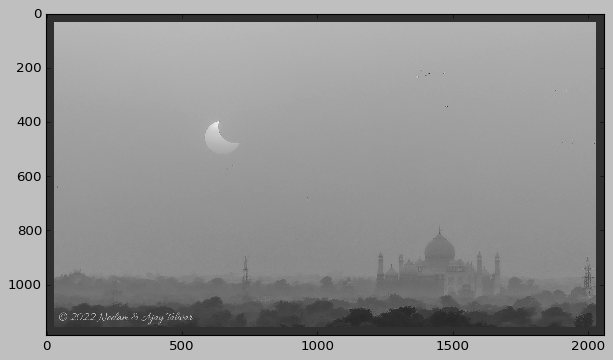

<PIL.Image.Image image mode=LA size=2060x1185 at 0x7F4175E67950>


In [27]:
#imagen 1
plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://apod.nasa.gov/apod/image/2210/2022-10-25pseTaj.jpg')).convert('LA')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [23]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape


(1185, 2060)

In [24]:
U.shape

(1185, 1185)

In [25]:
V.shape

(2060, 2060)

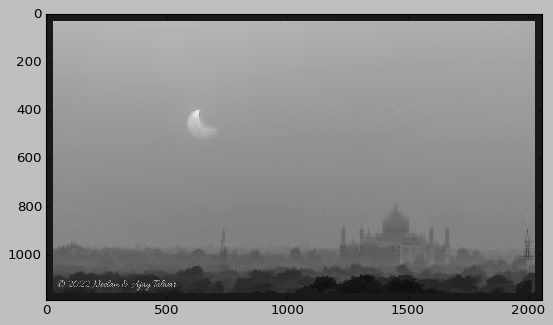

Imagen Comprimida


In [32]:
nvalue = 50
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])


plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Imagen Comprimida")

[69. 56. 57. ... 37. 38. 55.]


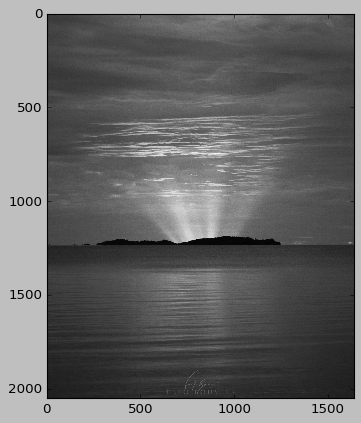

<PIL.Image.Image image mode=LA size=1638x2048 at 0x7F4175C73F90>


In [53]:
#imagen 2

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://apod.nasa.gov/apod/image/2205/EclipseRays_Bouvier_1638.jpg')).convert('LA')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [54]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape


(2048, 1638)

In [55]:
U.shape

(2048, 2048)

In [56]:
V.shape

(1638, 1638)

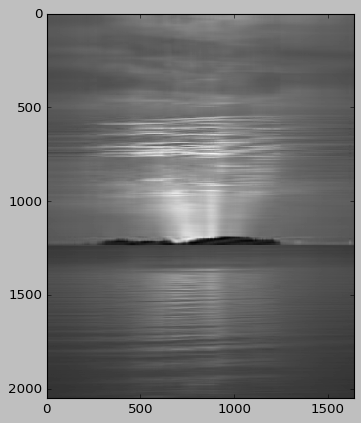

Imagen Comprimida


In [57]:
nvalue = 10
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])


plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Imagen Comprimida")

[255. 255. 255. ... 255. 255. 255.]


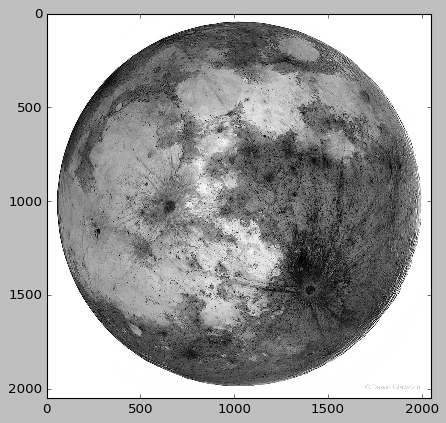

<PIL.Image.Image image mode=LA size=2048x2047 at 0x7F4175F4BED0>


In [44]:
#imagen 3
plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://apod.nasa.gov/apod/image/2203/InvertedMoon_Glawdzin_2048.jpg')).convert('LA')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [45]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape


(2047, 2048)

In [47]:
U.shape

(2047, 2047)

In [48]:
V.shape

(2048, 2048)

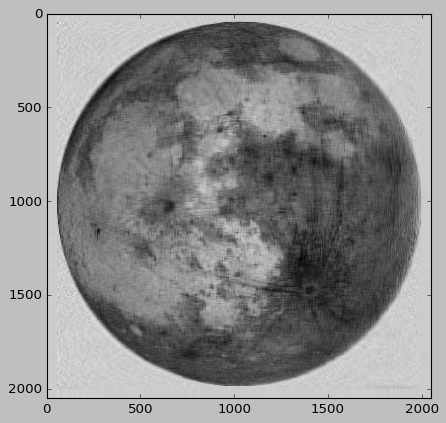

Imagen Comprimida


In [51]:
nvalue = 50
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])


plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Imagen Comprimida")

# Ejercicio 3

**Feature importances**

Para este ejercicio, te pediremos que sigas el tutorial de la siguiente pagina:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e




En el tutorial nos habla sobre el uso de PCA. Este puede ser usado para eliminar el ruido y comprension de datos como lo vimos en el Ejercicio 1 y 2

El analisis de PCA se basa en que los datos de entrada se almacenen en x, para todos z-scored es aplicada a cada variable. Posterior se hacer la construccion de eigendecomposition de la matriz de covarianza.

Los valores eigen son acomodados de manera decreciente a su varianza.

Finalmente la transformacion de los datos normalizados originales se reduce a PCA y se obtiene multiplicando (dot product) los datos originales normalizados con los eigenvectores lideres de la matriz de covarianza

Este PCA maximiza la varianza de los datos originales>>> una manera sencilla de visualizar esto es usando biplot!!

In [58]:
#Ejercicio extraido del tutorial https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e

#Aqui se utiliza scikit-learn y un set de iris
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')
# Load the data
iris = datasets.load_iris()
X = iris.data
y = iris.target
# Z-score the features
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
# The PCA model
pca = PCA(n_components=2) # estimate only 2 PCs
X_new = pca.fit_transform(X) # project the original data into the PCA space

Aqui se muestra la transformacion antes y despues de PCA

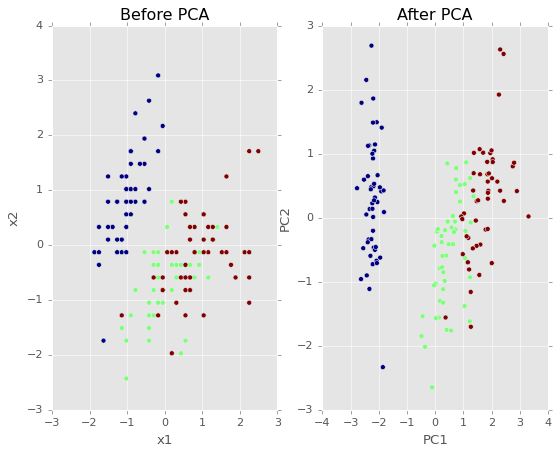

In [59]:
fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()


Aqui se muestra el espacio de PCA, la varianza maximizada en PC1 es cerca del 73% mientras la PC2 es del 22%, en total 95%

La prueba de maxima varianza se puede estimar con la covarianza del espacio reducido, estos espacios son relacionados con los eigenvectores correspondientes a PC1 y 2

In [66]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


In [65]:
np.cov(X_new.T)

array([[2.93808505e+00, 5.33928780e-16],
       [5.33928780e-16, 9.20164904e-01]])

In [64]:
pca.explained_variance_


array([2.93808505, 0.9201649 ])

Feature importance
-esta nos refleja la magnitud correspondiente a los valores de los eigenvectores. Entre mas alta la magnitud mayor importancia.

In [63]:
print(abs( pca.components_ ))

[[0.52106591 0.26934744 0.5804131  0.56485654]
 [0.37741762 0.92329566 0.02449161 0.06694199]]


Biplot, como lo describimos arriva es la mejor manera de visualizar todo en uno para el analisis de PCA

In [83]:
def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

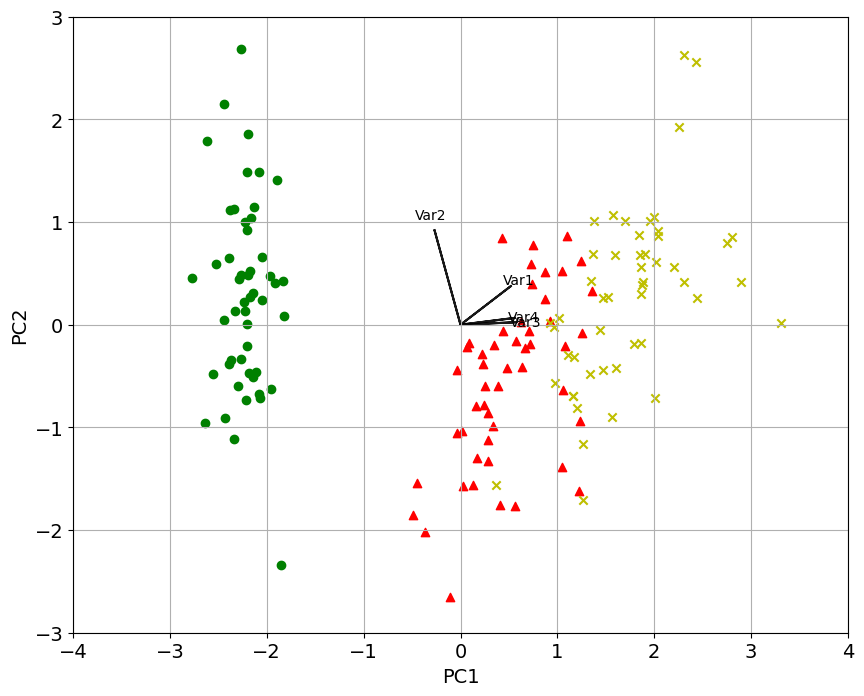

In [84]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) # reset ggplot style
biplot(X_new[:,0:2], np.transpose(pca.components_[0:2, :]), y)
plt.show()

Describe lo relevante del ejercicio y que descubriste de las variables análizadas. 

Este ejercicio ayudo a poder practicar en sklearn, numpy, matplot ciertas funciones para poder realizar reduccion, transformacion de datos y PCA.

# **CONCLUSIONES**

Realiza un comentario relacionado a los pasos que se llevaron a cabo en este proceso de features importances.

**¿Qué es feature importance y para que nos sirve?**

El termino feature importance se refiere a la importancia de cada caracteristica reflejada por la magnitud de los valores correspondientes en los eigenvectors. Entre mayor magnitud mayor importancia para el modelo.

Estos nos sirve para identificar cuales caracteristicas son las mas importantes para los 'Principal Components' PC1 y PC2

**¿Qué hallazgos fueron los más relevantes durante el análisis del ejercicio?**

Al momento de identificar el feature importance en el ejemplo del tutorial se da a conocer que las caracteristicas mas importantes para PC1 fueron 1,3 y 4 y para PC2 1 y 2

**¿Dónde lo aplicarías o te sería de utilidad este conocimiento?**

Una aplicacion sobre estos terminos puede ser aplicada al momento de hacer analisis de datos grandes, para hacer analisis y trending de defectos en la planta de manufactura donde trabajo. Se obtiene informacion diaria de defectos, en los cuales a veces hay mucho ruido. Este metodo nos puede ayudar a reducir ese ruido y reducir a valores mas importantes.

Otro ejemplo es con las camaras de inspeccion que se tienen en la planta de manufactura, donde se pueden reducir las imagenes obtenidas diarias, e incluso determinar cuales son las caracteristicas mas importantes de un producto bueno vs uno malo.